# Exploratory analysis of the Plant300K dataset

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget "https://lab.plantnet.org/seafile/d/bed81bc15e8944969cf6/files/?p=%2Fclass_idx_to_species_id.json&dl=1" -O class_idx_to_species_id.json
!wget "https://lab.plantnet.org/seafile/d/bed81bc15e8944969cf6/files/?p=%2Fplantnet300K_metadata.json&dl=1" -O plantnet300K_metadata.json
!wget "https://lab.plantnet.org/seafile/d/bed81bc15e8944969cf6/files/?p=%2Fplantnet300K_species_id_2_name.json&dl=1" -O plantnet300K_species_id_2_name.json

--2024-07-02 10:27:55--  https://lab.plantnet.org/seafile/d/bed81bc15e8944969cf6/files/?p=%2Fclass_idx_to_species_id.json&dl=1
Resolving lab.plantnet.org (lab.plantnet.org)... 193.51.117.136
Connecting to lab.plantnet.org (lab.plantnet.org)|193.51.117.136|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lab.plantnet.org/seafile/seafhttp/files/ee53ef71-3e01-4aee-825a-ec2be3fd34f7/class_idx_to_species_id.json [following]
--2024-07-02 10:27:56--  https://lab.plantnet.org/seafile/seafhttp/files/ee53ef71-3e01-4aee-825a-ec2be3fd34f7/class_idx_to_species_id.json
Reusing existing connection to lab.plantnet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 24837 (24K) [application/octet-stream]
Saving to: ‘class_idx_to_species_id.json’

class_idx_to_specie 100%[===================>]  24.25K  --.-KB/s    in 0.1s    

2024-07-02 10:27:56 (239 KB/s) - ‘class_idx_to_species_id.json’ saved [24837/24837]

--2024-07-02 10:27:56--  https://lab.plantne

In [ ]:
# load in plant species name metadata
with open("plantnet300K_species_id_2_name.json", "r") as json_file:
  plant_num_name_dict = json.load(json_file)
print("Number of plant species:")
print(len(plant_num_name_dict))

# download full image metadata
with open("plantnet300K_metadata.json", "r") as json_file:
  plantnet300k_metadata_dict = json.load(json_file)
print("Number of images in plantnet300K:")
print(len(plantnet300k_metadata_dict))

# download class id to species id metadata
with open("class_idx_to_species_id.json", "r") as json_file:
  classid_speciesid_dict = json.load(json_file)
print("Number of classes in plantnet300K:")
print(len(classid_speciesid_dict))

Number of plant species:
1081
Number of images in plantnet300K:
306146
Number of classes in plantnet300K:
1081


# 1. Investigate which Toolbox of multispecies sward plants are in plantnet300K

In [ ]:
# First lookup TOMS (https://www.multispeciessward.co.uk/) species in the dataset

toms_species_latin = [
    'Trifolium pratense',
    'Trifolium repens',
    'Trifolium hybridum',
    'Medicago sativa',
    'Onobrychis viciifolia',
    'Lotus corniculatus',
    'Cichorium intybus',
    'Plantago lanceolata',
    'Achillea millefolium',
    'Sanguisorba minor',
    'Petroselinum crispum',
    'Lolium perenne',
    'Dactylis glyomerata',
    'Phleum pratense',
    'Schedonorus arundinaceus',
    'Schedonorus pratensis',
    'Alopecurus pratensis',
]

toms_species_common = [
    "Red clover",
    "White clover",
    "Alsike clover",
    "Lucerne",
    "Sainfoin",
    "Bird's-foot-trefoil",
    "Chicory",
    "Ribwort plaintain",
    "Yarrow",
    "Sheep's burnet",
    "Sheep's parsley",
    "Perennial rye-grass",
    "Cock's-foot",
    "Timothy",
    "Tall fescue",
    "Meadow fescue",
    "Meadow foxtail"
]

assert (len(toms_species_latin) == len(toms_species_common))
print(len(toms_species_latin))

17


In [ ]:
# check presence using direct string matching (latin)
toms_300k_species_latin = [(species, plant300k_species) for species in toms_species_latin for plant300k_species in plant_num_name_dict.values() if species in plant300k_species]
print(toms_300k_species_latin)
print(f"Number of toms species in plantnet300K = {len(toms_300k_species_latin)}/17")

[('Trifolium pratense', 'Trifolium pratense L.'), ('Trifolium repens', 'Trifolium repens L.'), ('Trifolium hybridum', 'Trifolium hybridum L.')]
Number of toms species in plantnet300K = 3/17


In [ ]:
# check presence using direct string matching (common)
toms_300k_species_common = [(species, plant300k_species) for species in toms_species_common for plant300k_species in plant_num_name_dict.values() if species in plant300k_species]
print(toms_300k_species_common)

[]


In [ ]:
!pip install fuzzywuzzy

In [ ]:
# try fuzzy matching (75% similarity threshold)

from fuzzywuzzy import fuzz

threshold = 75

toms_300k_species_latin_fuzzy75 = [
    (species, plant_name) for species in toms_species_latin
    for plant_name in plant_num_name_dict.values()
    if fuzz.ratio(species, plant_name) >= threshold
]
print(len(toms_300k_species_latin_fuzzy75))
print(toms_300k_species_latin_fuzzy75)

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


10
[('Trifolium pratense', 'Trifolium arvense L.'), ('Trifolium pratense', 'Trifolium patens Schreb.'), ('Trifolium pratense', 'Trifolium pratense L.'), ('Trifolium pratense', 'Trifolium rubens L.'), ('Trifolium pratense', 'Trifolium repens L.'), ('Trifolium repens', 'Trifolium arvense L.'), ('Trifolium repens', 'Trifolium pratense L.'), ('Trifolium repens', 'Trifolium rubens L.'), ('Trifolium repens', 'Trifolium repens L.'), ('Trifolium hybridum', 'Trifolium hybridum L.')]


In [ ]:
# try fuzzy matching (90% similarity threshold)

from fuzzywuzzy import fuzz

threshold = 90

toms_300k_species_latin_fuzzy90 = [
    (species, plant_name) for species in toms_species_latin
    for plant_name in plant_num_name_dict.values()
    if fuzz.ratio(species, plant_name) >= threshold
]
print(len(toms_300k_species_latin_fuzzy90))
print(toms_300k_species_latin_fuzzy90)

3
[('Trifolium pratense', 'Trifolium pratense L.'), ('Trifolium repens', 'Trifolium repens L.'), ('Trifolium hybridum', 'Trifolium hybridum L.')]


Conclusion: 3 clover matches in TOMS & plantnet300K

# 2. Assemble metadata

In [ ]:
# convert full image metadata to df and add species name mapping

metadata_df = pd.DataFrame.from_dict(plantnet300k_metadata_dict, orient='index')

metadata_df['species'] = metadata_df['species_id'].map(plant_num_name_dict)

metadata_df.head()

,species_id,obs_id,organ,is_shareable,v1_id,author,license,split,species
6033c318d5678da896eae5ae54ac60f71e5286bf,1391810,1008601284,leaf,True,,Heribert Zimmermann,cc-by-sa,val,Dryopteris expansa (C.Presl) Fraser-Jenk. & Jermy
66d6455735fbdc582629dfc58940d9f409c7a9b3,1363021,1005119570,flower,True,,Jimenez Melissa,cc-by-sa,val,Cenchrus setaceus (Forssk.) Morrone
1a5c3ffe9142f29df7fb56fc519764a457e8d01d,1398567,1004431075,leaf,True,,Lisa,cc-by-sa,val,Smilax rotundifolia L.
e86c71b84e97af16307801a1b986269fb4243fc1,1362954,1008006449,leaf,True,,Pasqualotto Rossella,cc-by-sa,val,Schefflera actinophylla (Endl.) Harms
8f954427dfbf8853bf8d655fa9bdda2801ebc025,1359498,1006017920,flower,True,,Elizabeth Roy,cc-by-sa,test,Trifolium incarnatum L.


Number of images of toms species = 10756


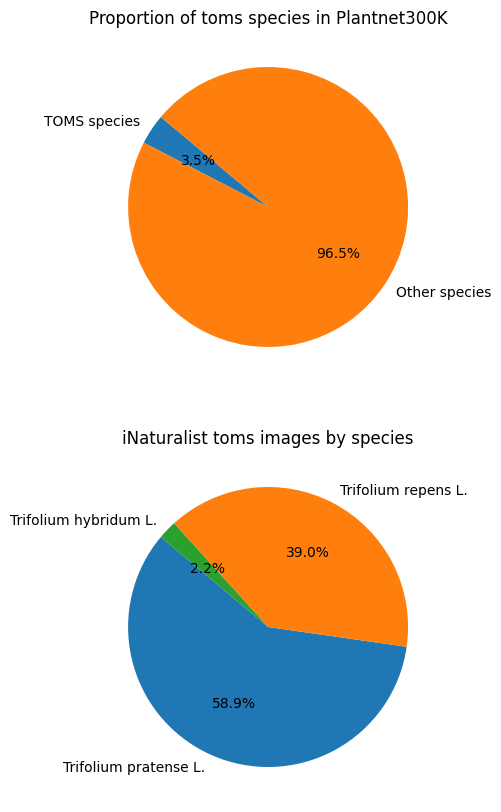

In [ ]:
# Proportion of plant images that are toms species

toms_names = [plant300k_species for species in toms_species_latin for plant300k_species in plant_num_name_dict.values() if species in plant300k_species]

fig, axs = plt.subplots(2, 1, figsize = (20, 10))

toms_species_metadata = metadata_df[metadata_df['species'].isin(toms_names)]
print(f"Number of images of toms species = {len(toms_species_metadata)}")

pct_toms_species = (len(toms_species_metadata) / len(metadata_df)) * 100
pct_other_species = 100 - pct_toms_species

overall_labels = ['TOMS species', 'Other species']
toms_proportion = [pct_toms_species, pct_other_species]

axs[0].pie(toms_proportion, labels=overall_labels, autopct='%1.1f%%', startangle=140)
axs[0].set_title("Proportion of toms species in Plantnet300K")

toms_species_counts = toms_species_metadata['species'].value_counts()
toms_species_labels = [str(cat_id) for cat_id in toms_species_counts.index]
toms_species_proportions = toms_species_counts.values

axs[1].pie(toms_species_proportions, labels=toms_species_labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title("iNaturalist toms images by species")

plt.show()

# 3. Explore image distribution

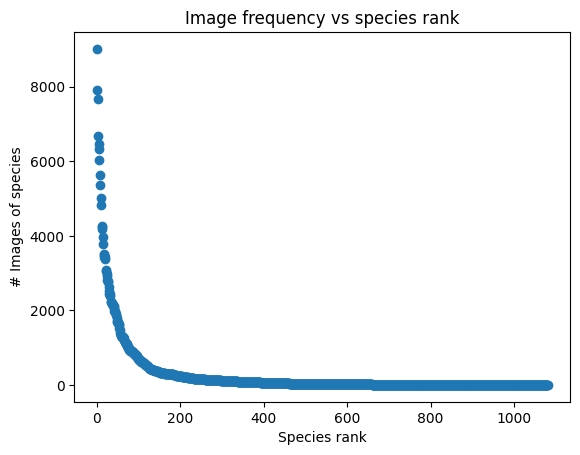

In [ ]:
# plot species frequency vs rank (shows zipf's law behaviour)

species_counts = metadata_df['species'].value_counts()

species_ranks = range(1, len(species_counts) + 1)

fig, ax = plt.subplots()

ax.scatter(species_ranks, species_counts[species_counts.index])
ax.set_xlabel("Species rank")
ax.set_ylabel("# Images of species")
ax.set_title("Image frequency vs species rank")

plt.show()

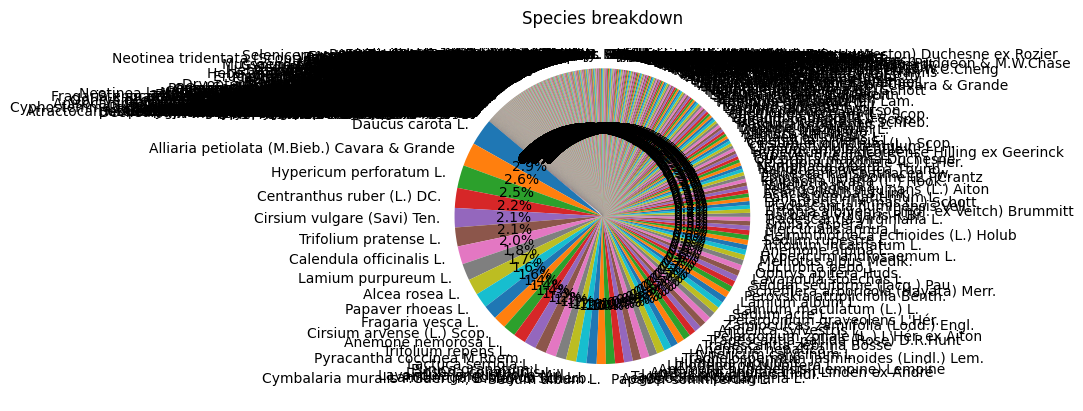

In [ ]:
# Image distribution by species

species_counts = metadata_df['species'].value_counts()

fig, ax = plt.subplots()
ax.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Species breakdown')

plt.show()


In [ ]:
# Report list of frequent species

species_counts = metadata_df['species'].value_counts()

print("Twenty most frequent genuses:\n")
for i, species in enumerate(species_counts[:20]):
  print(f"Species name: {species_counts.index[i]}, Num images: {species_counts.values[i]}")

Twenty most frequent genuses:

Species name: Daucus carota L., Num images: 9012
Species name: Alliaria petiolata (M.Bieb.) Cavara & Grande, Num images: 7922
Species name: Hypericum perforatum L., Num images: 7675
Species name: Centranthus ruber (L.) DC., Num images: 6670
Species name: Cirsium vulgare (Savi) Ten., Num images: 6474
Species name: Trifolium pratense L., Num images: 6330
Species name: Calendula officinalis L., Num images: 6047
Species name: Lamium purpureum L., Num images: 5628
Species name: Alcea rosea L., Num images: 5357
Species name: Papaver rhoeas L., Num images: 5009
Species name: Fragaria vesca L., Num images: 4828
Species name: Cirsium arvense (L.) Scop., Num images: 4275
Species name: Anemone nemorosa L., Num images: 4236
Species name: Trifolium repens L., Num images: 4193
Species name: Pyracantha coccinea M.Roem., Num images: 3980
Species name: Lactuca serriola L., Num images: 3791
Species name: Punica granatum L., Num images: 3514
Species name: Lapsana communis L

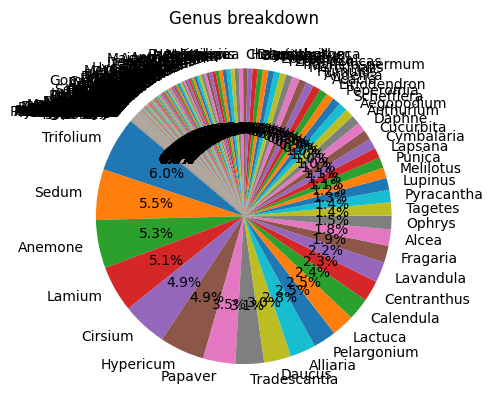

In [ ]:
# Image distribution by genus

metadata_df['genus'] = metadata_df['species'].str.split().str[0]

genus_counts = metadata_df['genus'].value_counts()

fig, ax = plt.subplots()
ax.pie(genus_counts, labels=genus_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Genus breakdown')

plt.show()

In [ ]:
# Report list of most frequent genus

metadata_df['genus'] = metadata_df['species'].str.split().str[0]

genus_counts = metadata_df['genus'].value_counts()


print("Twenty most frequent genuses:\n")
for i, genus in enumerate(genus_counts[:20]):
  print(f"Genus name: {genus_counts.index[i]}, Num images: {genus_counts.values[i]}")

Twenty most frequent genuses:

Genus name: Trifolium, Num images: 18333
Genus name: Sedum, Num images: 16920
Genus name: Anemone, Num images: 16162
Genus name: Lamium, Num images: 15485
Genus name: Cirsium, Num images: 15124
Genus name: Hypericum, Num images: 14979
Genus name: Papaver, Num images: 10766
Genus name: Tradescantia, Num images: 9557
Genus name: Daucus, Num images: 9039
Genus name: Alliaria, Num images: 8574
Genus name: Pelargonium, Num images: 7735
Genus name: Lactuca, Num images: 7579
Genus name: Calendula, Num images: 7437
Genus name: Centranthus, Num images: 7015
Genus name: Lavandula, Num images: 6828
Genus name: Fragaria, Num images: 5684
Genus name: Alcea, Num images: 5464
Genus name: Ophrys, Num images: 4604
Genus name: Tagetes, Num images: 4415
Genus name: Pyracantha, Num images: 4155


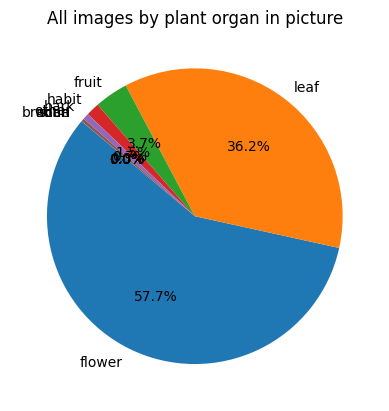

In [ ]:
# Images by organ pictured

organ_counts = metadata_df['organ'].value_counts()

fig, ax = plt.subplots()
ax.pie(organ_counts, labels=organ_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('All images by plant organ in picture')

plt.show()

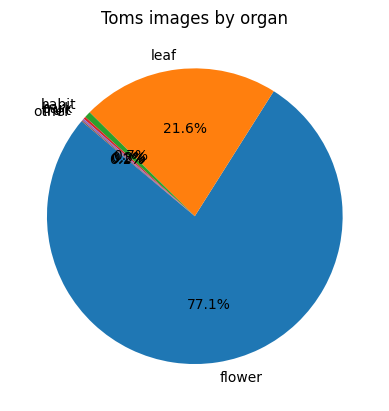

In [ ]:
# Toms images by organ

clover_organ_counts =metadata_df[metadata_df['species'].isin(toms_names)]['organ'].value_counts()

fig, ax = plt.subplots()
ax.pie(clover_organ_counts, labels=clover_organ_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Toms images by organ')

plt.show()

For downloading the full plantnet300K dataset:


In [ ]:
# download from Zenodo

!wget https://zenodo.org/records/5645731/files/plantnet_300K.zip -O plantnet_300K.zip

--2024-07-02 10:29:07--  https://zenodo.org/records/5645731/files/plantnet_300K.zip
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31670505069 (29G) [application/octet-stream]
Saving to: ‘plantnet_300K.zip’

plantnet_300K.zip     0%[                    ]   2.99M   940KB/s    eta 9h 12m ^C
